# HAI-21.03 Dataset Analysis with Single LSTM Model

This notebook implements a simplified LSTM approach with a larger sliding window (192 time steps) for analyzing the HAI-21.03 industrial control system security dataset. It trains a single model on all training data and evaluates it on all test files without retraining.

In [5]:
# Import required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import custom modules
from hai_data_processor import HAIDataProcessor
import simplified_lstm_utils as utils

# Set plot style
plt.style.use('ggplot')
sns.set(style="darkgrid")

## 1. Global Variables Setup

Set up all global variables, including paths, parameters, and configurations.

In [6]:
# Set paths
DATA_DIR = 'hai-security-dataset/hai-21.03'
OUTPUT_DIR = 'hai-security-dataset/processed'
MODEL_DIR = 'models/single_model'

# Create model directory if it doesn't exist
os.makedirs(MODEL_DIR, exist_ok=True)

# Set model parameters
SEQ_LENGTH = 128  # Sequence length (time steps)
STRIDE = 5        # Sliding window stride
N_COMPONENTS = 20 # Number of PCA components
N_FEATURES = 60   # Number of features to select
CORRELATION_THRESHOLD = 0.7  # Graph edge correlation threshold
MIN_ANOMALY_LENGTH = 40      # Minimum anomaly length
GAP_THRESHOLD = 3            # Maximum gap to merge anomalies

# Set training parameters
EPOCHS = 5
BATCH_SIZE = 64
VALIDATION_SPLIT = 0.2
PATIENCE = 5
LEARNING_RATE = 0.01

# Set anomaly detection parameters
ANOMALY_SCORE_THRESHOLD = 0.65  # Anomaly score threshold
CONTAMINATION = 0.003           # Contamination rate for dynamic threshold

# Create parameters dictionary
PARAMS = {
    'model_dir': MODEL_DIR,
    'seq_length': SEQ_LENGTH,
    'stride': STRIDE,
    'n_components': N_COMPONENTS,
    'n_features': N_FEATURES,
    'correlation_threshold': CORRELATION_THRESHOLD,
    'min_anomaly_length': MIN_ANOMALY_LENGTH,
    'gap_threshold': GAP_THRESHOLD,
    'epochs': EPOCHS,
    'batch_size': BATCH_SIZE,
    'validation_split': VALIDATION_SPLIT,
    'patience': PATIENCE,
    'learning_rate': LEARNING_RATE,
    'anomaly_score_threshold': ANOMALY_SCORE_THRESHOLD,
    'contamination': CONTAMINATION
}

## 2. Data Loading and Processing

Load the HAI-21.03 dataset and perform initial processing.

In [7]:
# Initialize data processor
processor = HAIDataProcessor(DATA_DIR, OUTPUT_DIR)

# Load data
processor.load_data()

# Get all training data and merge
train_df = processor.merge_train_data()

# Print dataset information
print(f"Training data shape: {train_df.shape}")
print(f"Training data columns: {train_df.columns[:10].tolist()}...")

# Get test dataset information
print("\nTest datasets:")
for name, df in processor.test_data.items():
    print(f"  {name}: {df.shape}")

Found 3 train files and 5 test files
Loading train files: 

Loading train files:  33%|███▎      | 1/3 [00:03<00:06,  3.27s/it]

train1: 216001 rows, 84 columns


Loading train files:  67%|██████▋   | 2/3 [00:05<00:02,  2.94s/it]

train2: 226801 rows, 84 columns


Loading train files: 100%|██████████| 3/3 [00:11<00:00,  3.87s/it]


train3: 478801 rows, 84 columns
Loading test files: 

Loading test files:  20%|██        | 1/5 [00:00<00:02,  1.82it/s]

test1: 43201 rows, 84 columns


Loading test files:  40%|████      | 2/5 [00:02<00:03,  1.09s/it]

test2: 118801 rows, 84 columns


Loading test files:  60%|██████    | 3/5 [00:03<00:02,  1.21s/it]

test3: 108001 rows, 84 columns


Loading test files:  80%|████████  | 4/5 [00:03<00:00,  1.08it/s]

test4: 39601 rows, 84 columns


Loading test files: 100%|██████████| 5/5 [00:04<00:00,  1.01it/s]

test5: 92401 rows, 84 columns


Merged training data: 921603 rows, 84 columns
Training data shape: (921603, 84)
Training data columns: ['time', 'p1_b2004', 'p1_b2016', 'p1_b3004', 'p1_b3005', 'p1_b4002', 'p1_b4005', 'p1_b400b', 'p1_b4022', 'p1_fcv01d']...

Test datasets:
  test1: (43201, 84)
  test2: (118801, 84)
  test3: (108001, 84)
  test4: (39601, 84)
  test5: (92401, 84)


## 3. Train Single Model and Evaluate on All Test Files

Train a single model on all training data and evaluate it on all test files.

Training a single model on all training data...
Explained variance ratio: 0.9976
Selected 60 features out of 82
Epoch 1/5
2304/2304 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 10.7492

2304/2304 ━━━━━━━━━━━━━━━━━━━━ 183s 74ms/step - loss: 10.7482 - val_loss: 5.1584 - learning_rate: 0.0100
Epoch 2/5
2304/2304 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 7.6145

2304/2304 ━━━━━━━━━━━━━━━━━━━━ 156s 68ms/step - loss: 7.6145 - val_loss: 4.9948 - learning_rate: 0.0100
Epoch 3/5
2304/2304 ━━━━━━━━━━━━━━━━━━━━ 166s 72ms/step - loss: 7.3416 - val_loss: 5.0699 - learning_rate: 0.0100
Epoch 4/5
2304/2304 ━━━━━━━━━━━━━━━━━━━━ 222s 81ms/step - loss: 7.4375 - val_loss: 5.0059 - learning_rate: 0.0100
Epoch 5/5
2304/2304 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 7.3396

2304/2304 ━━━━━━━━━━━━━━━━━━━━ 180s 78ms/step - loss: 7.3396 - val_loss: 4.9627 - learning_rate: 0.0100
5760/5760 ━━━━━━━━━━━━━━━━━━━━ 77s 13ms/step
Dynamic threshold: 59.893371

Evaluating test file: test1
270/270 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
Precision: 0.4378
Recall: 0.8060
F1 Score: 0.5674
Accuracy: 0.9821
False Positive Rate: 0.0153
False Negative Rate: 0.1940


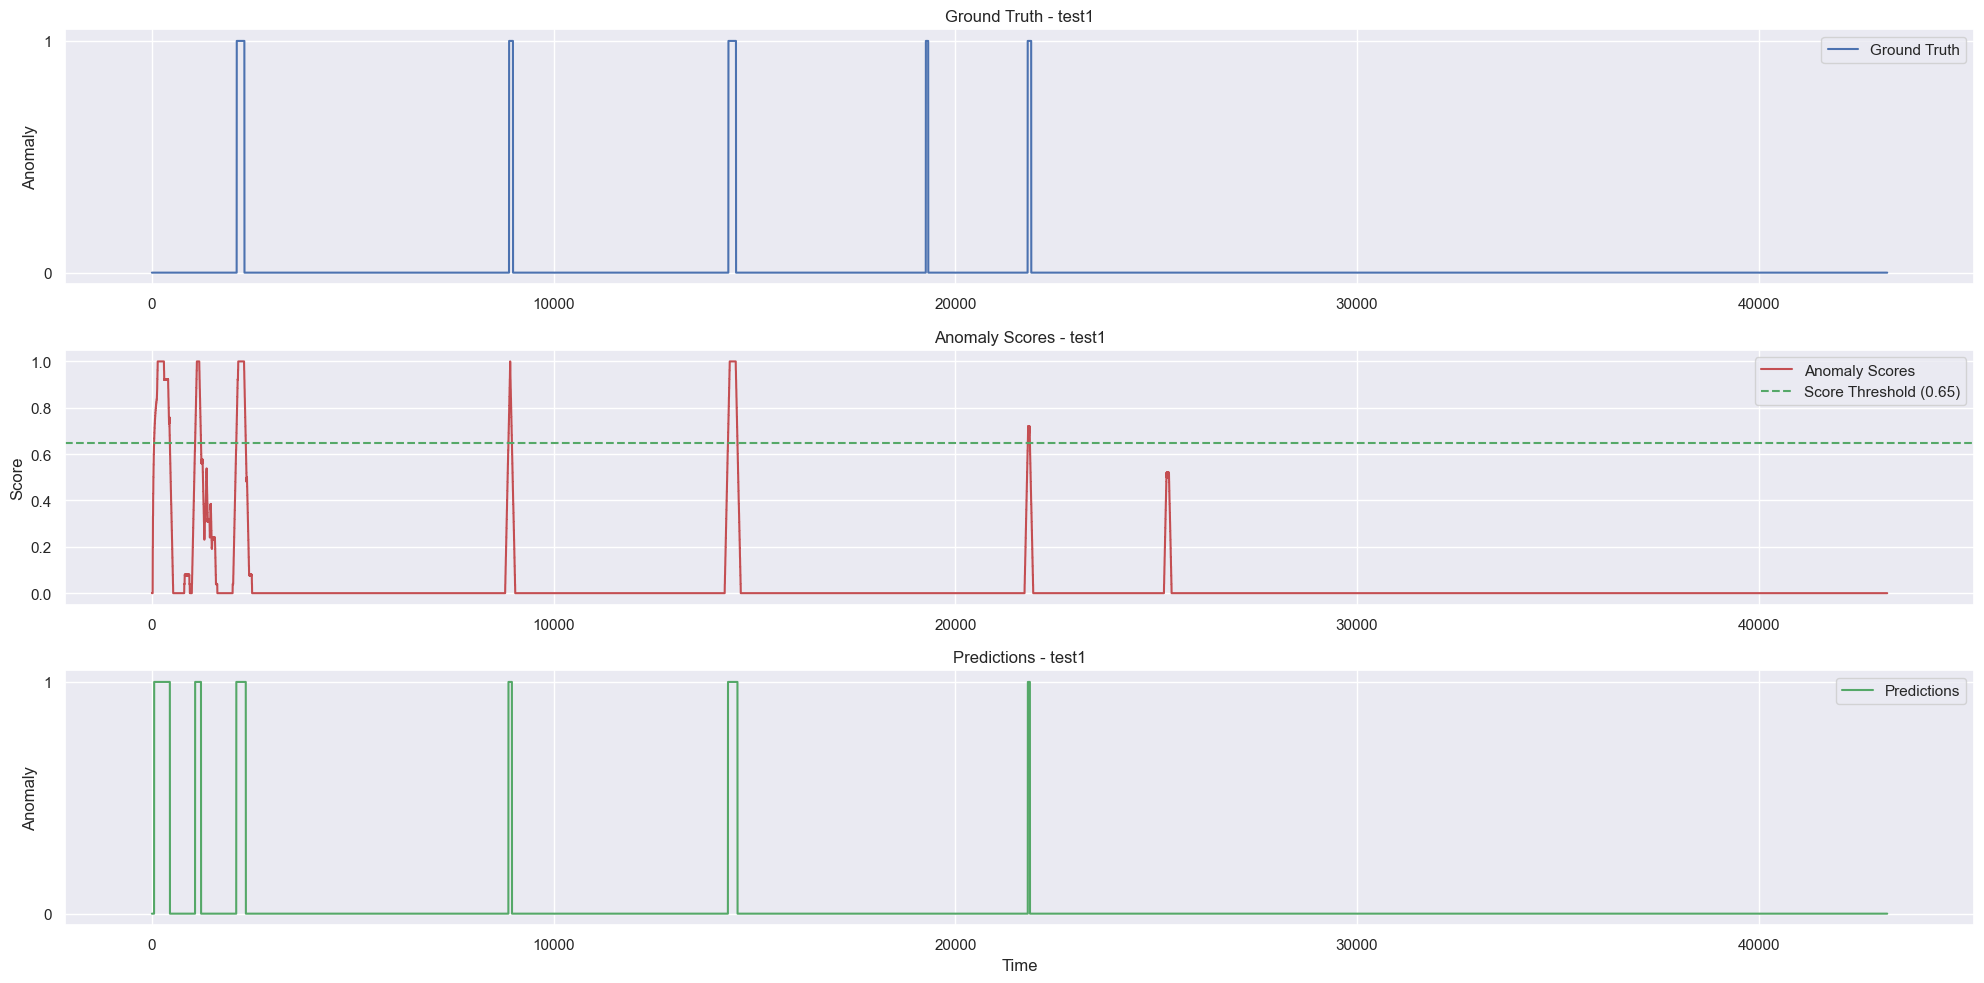

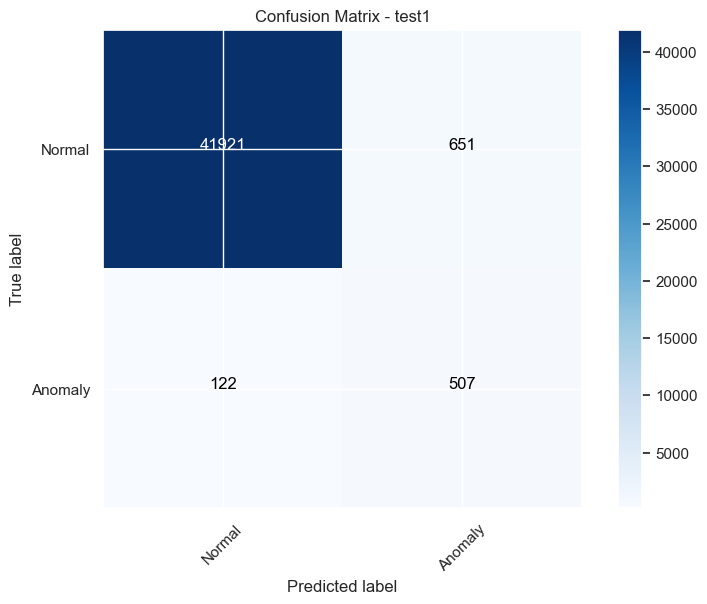


Evaluating test file: test2
742/742 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step
Precision: 0.6715
Recall: 0.4398
F1 Score: 0.5315
Accuracy: 0.9775
False Positive Rate: 0.0064
False Negative Rate: 0.5602


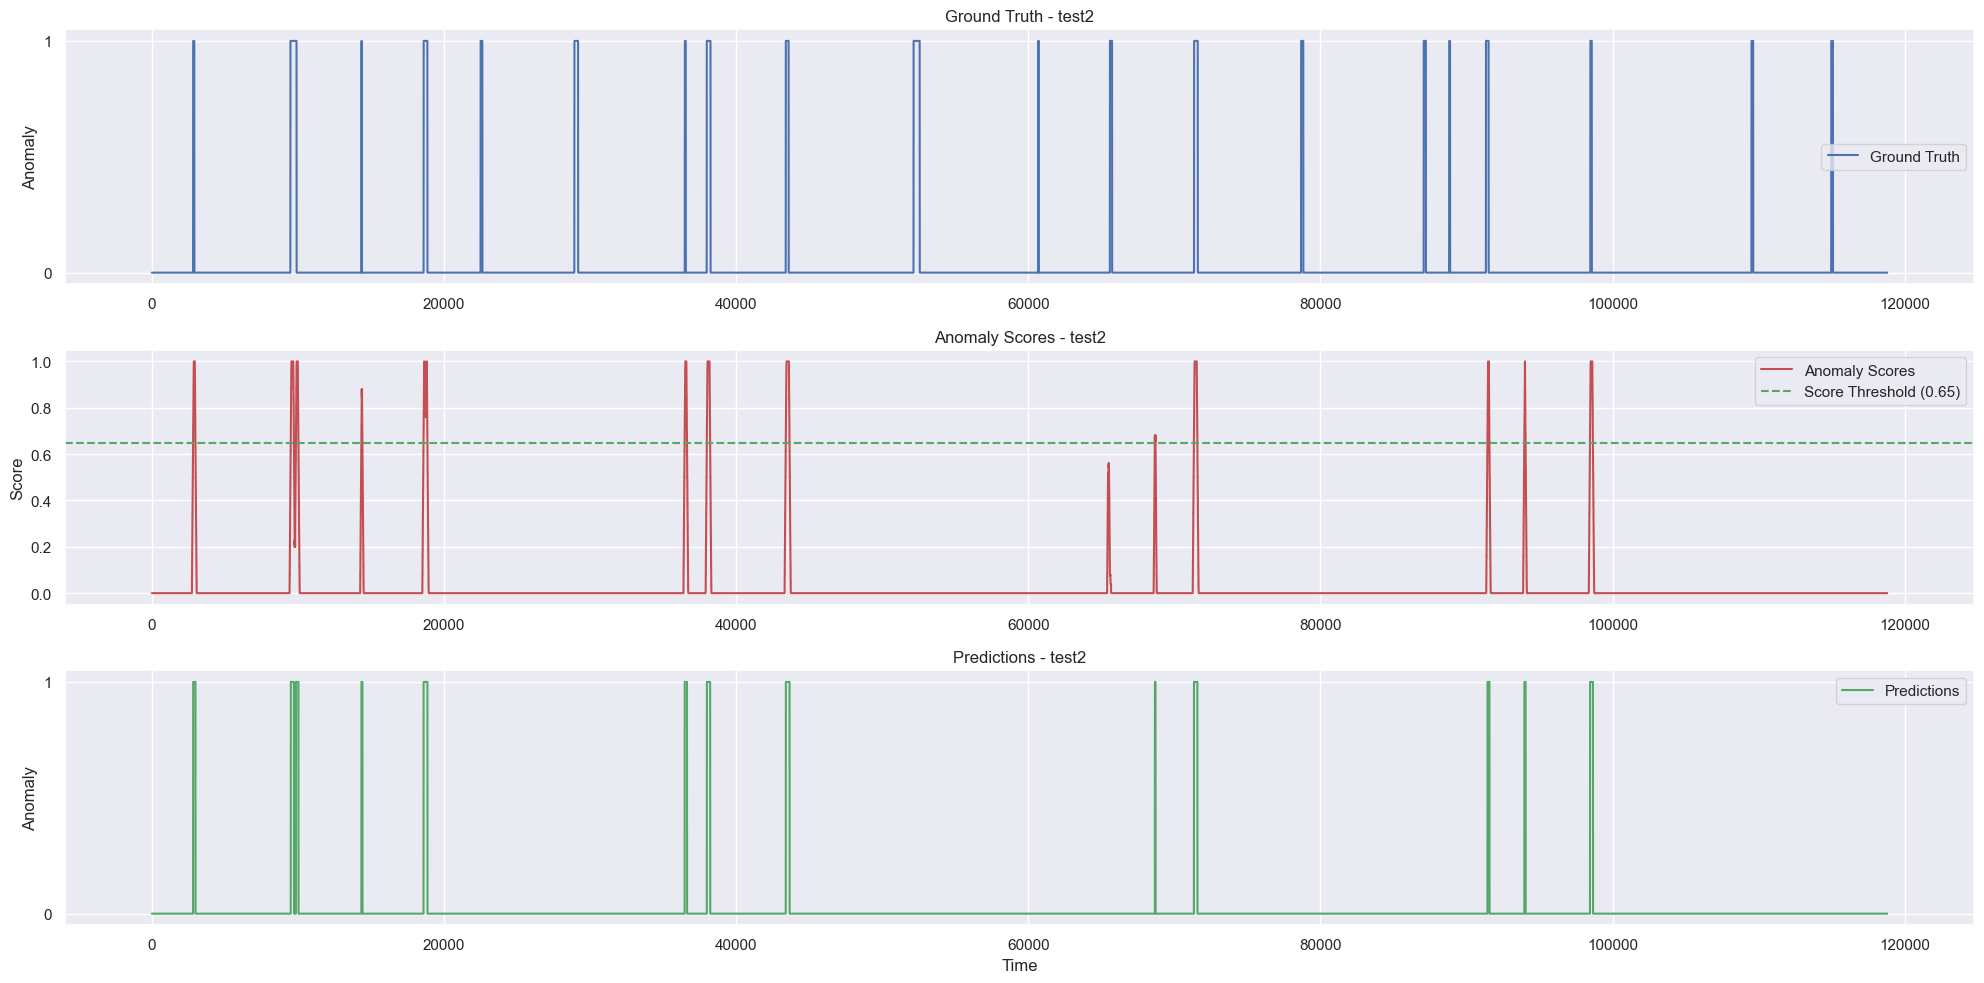

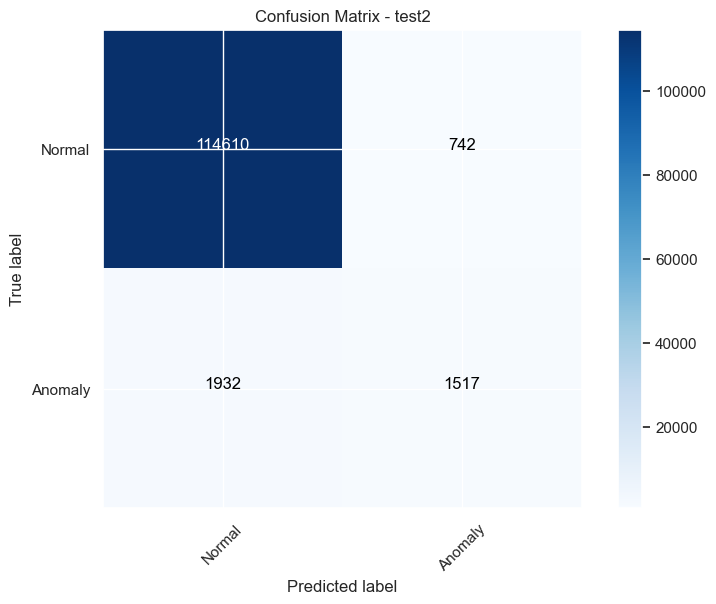


Evaluating test file: test3
675/675 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step
Precision: 0.6692
Recall: 0.7420
F1 Score: 0.7037
Accuracy: 0.9911
False Positive Rate: 0.0053
False Negative Rate: 0.2580


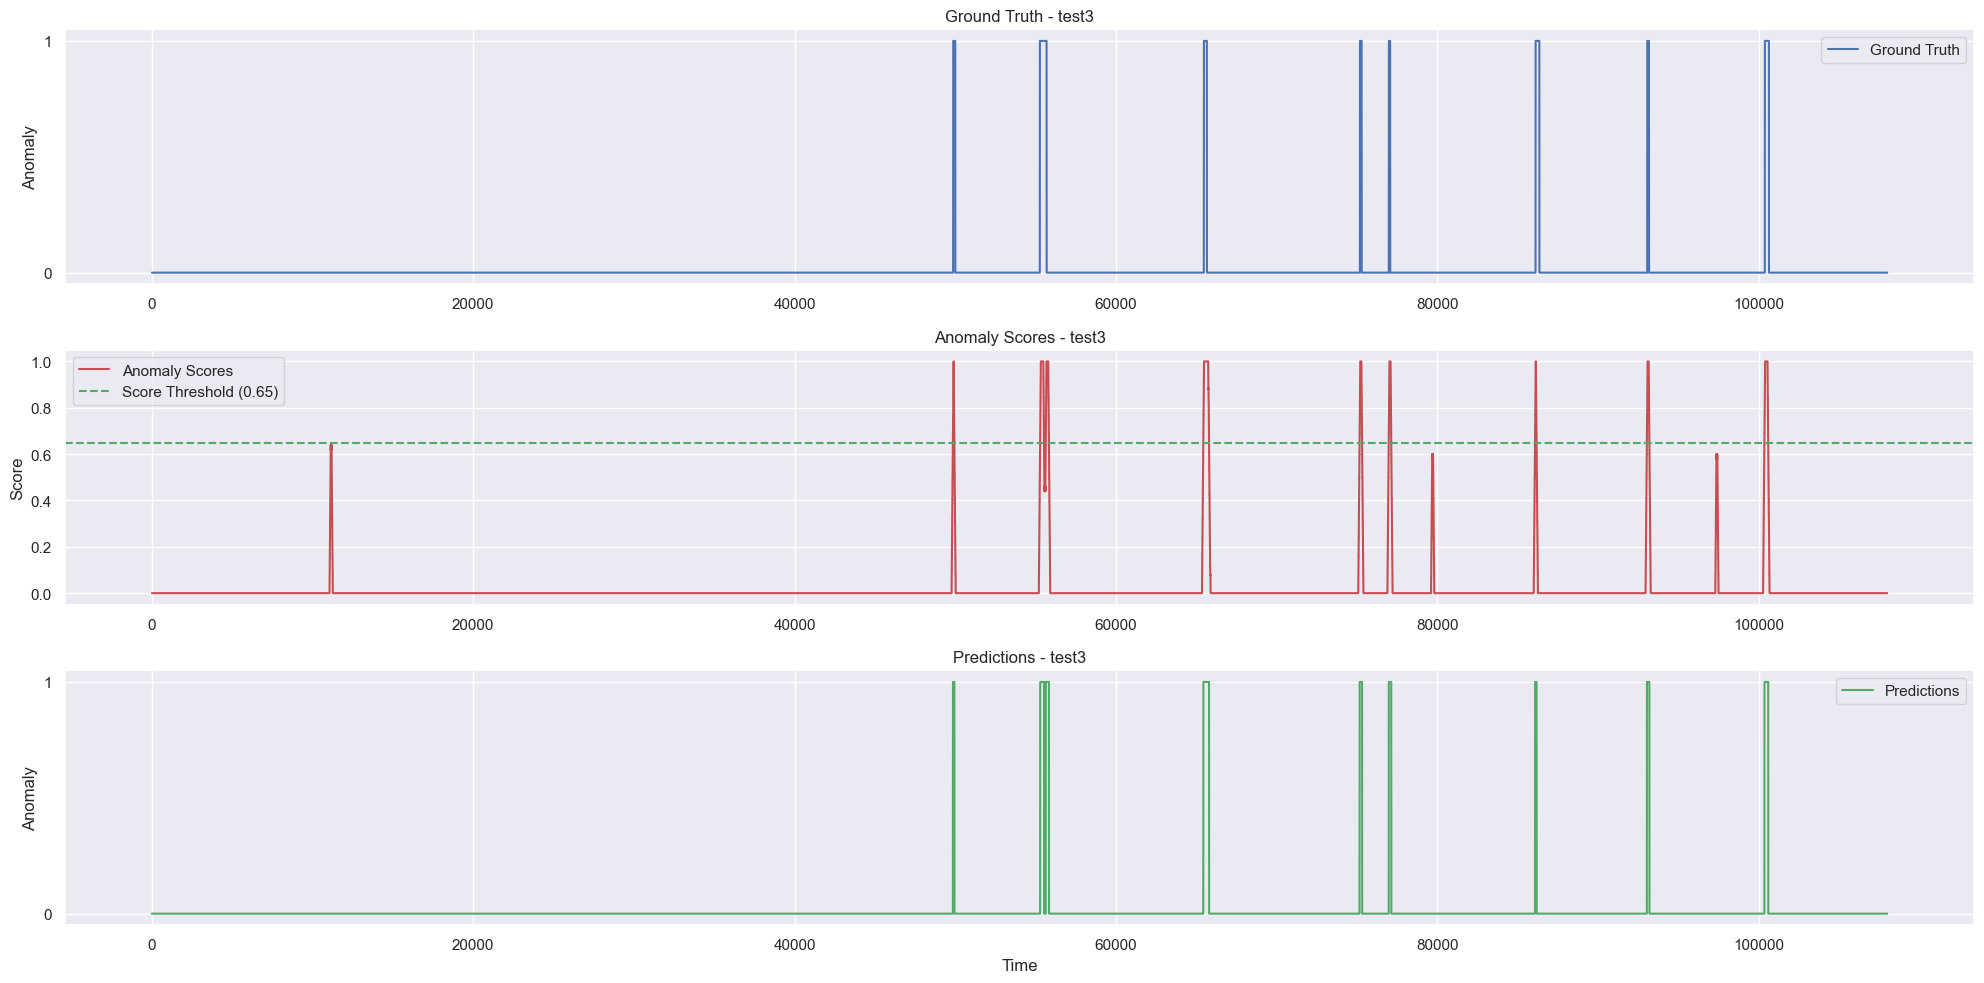

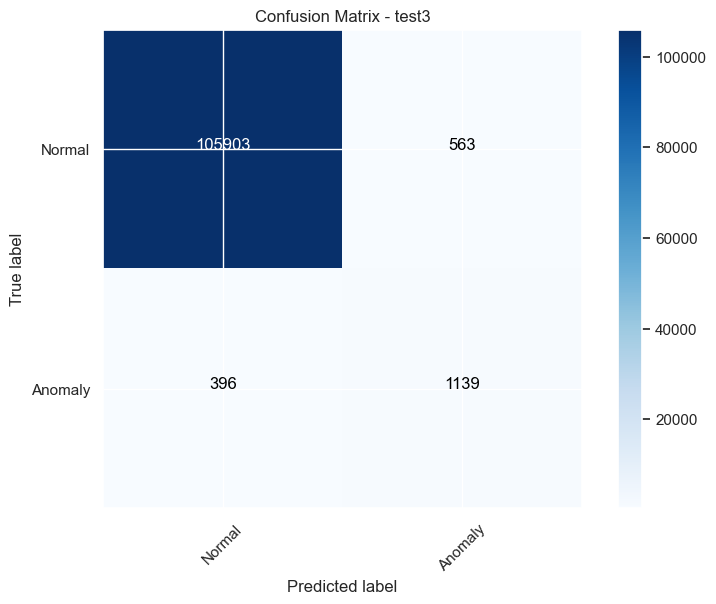


Evaluating test file: test4
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
Precision: 0.8605
Recall: 0.8902
F1 Score: 0.8751
Accuracy: 0.9926
False Positive Rate: 0.0043
False Negative Rate: 0.1098


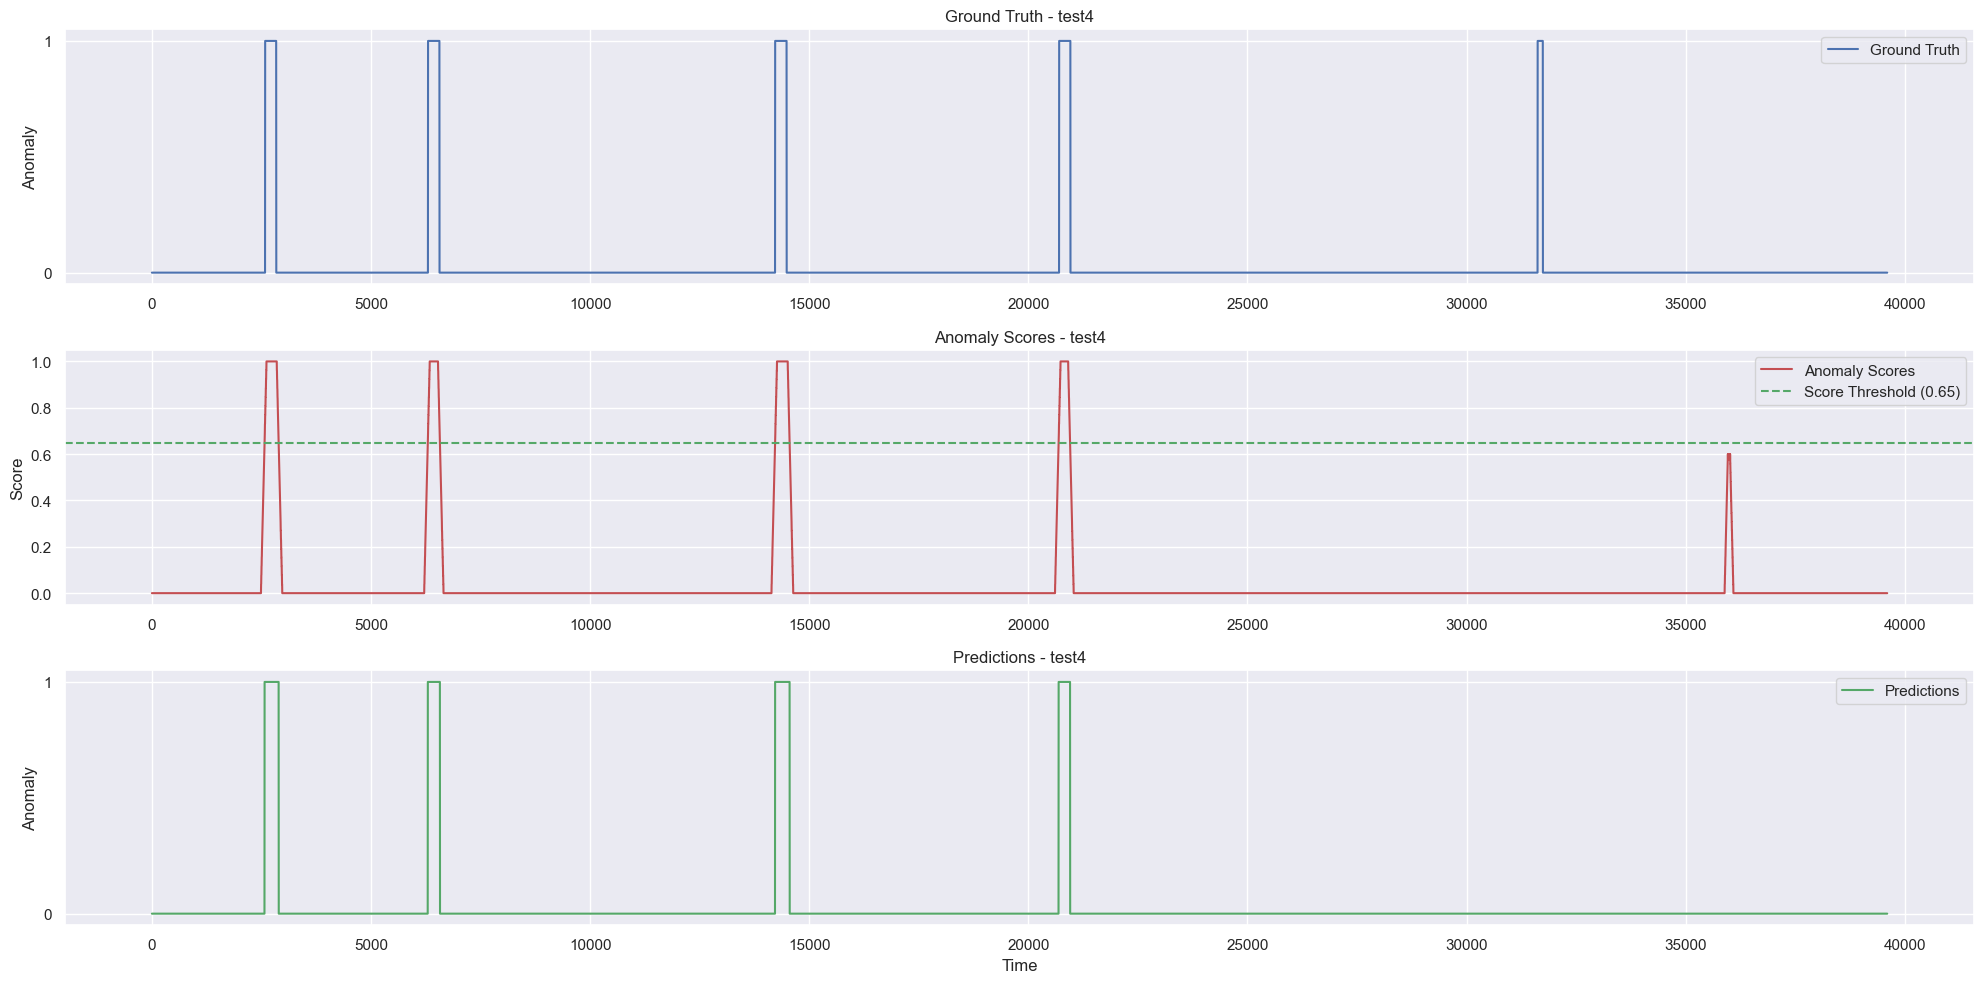

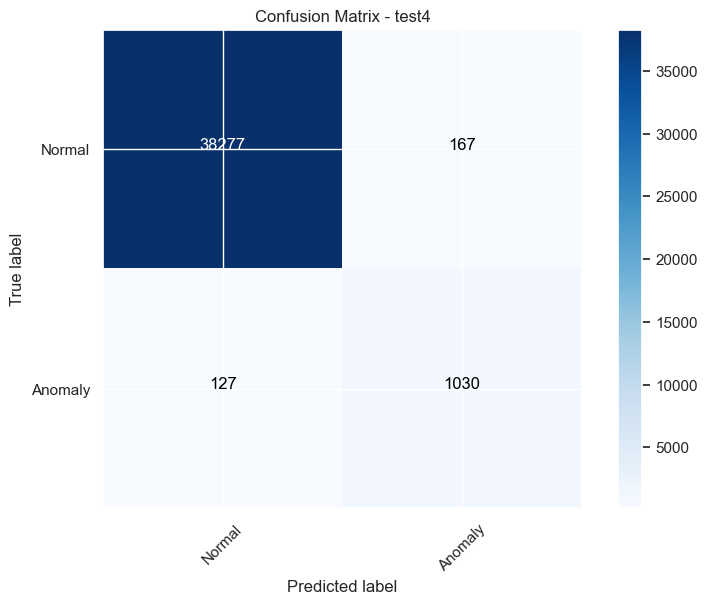


Evaluating test file: test5
577/577 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step
Precision: 0.6341
Recall: 0.6775
F1 Score: 0.6551
Accuracy: 0.9832
False Positive Rate: 0.0094
False Negative Rate: 0.3225


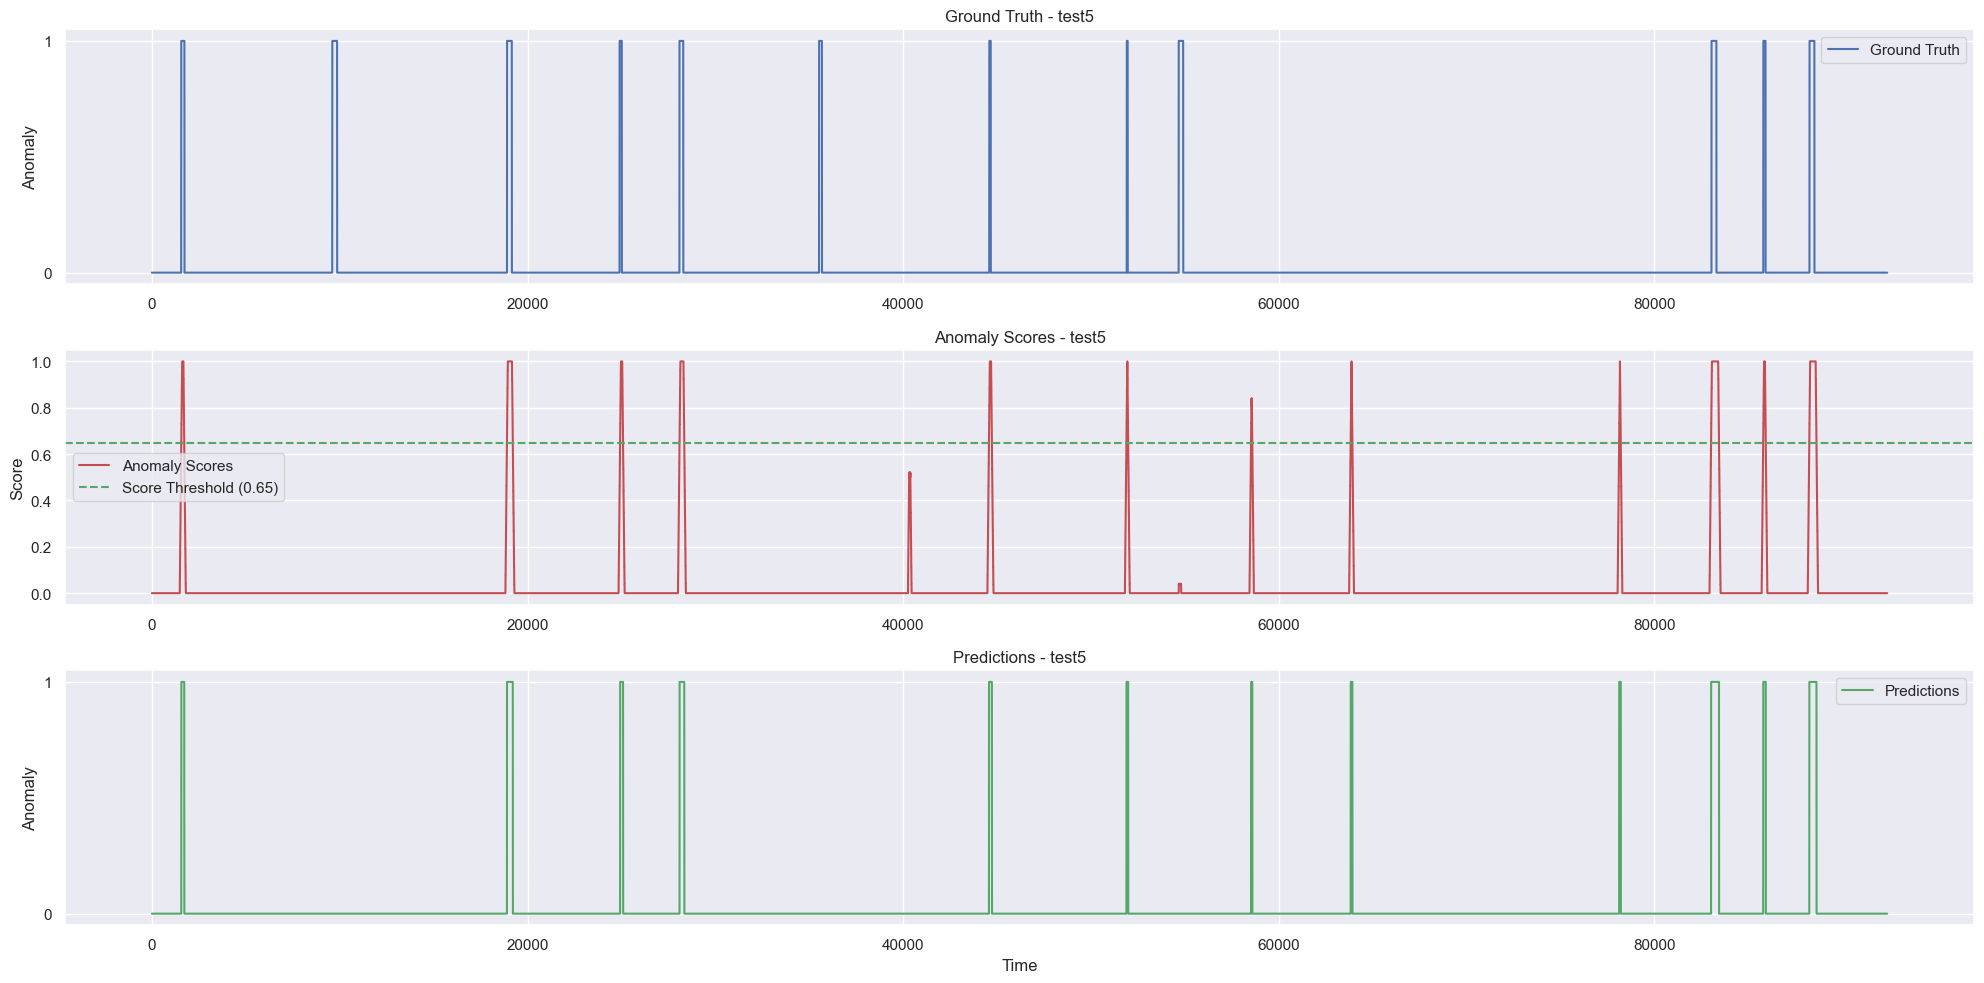

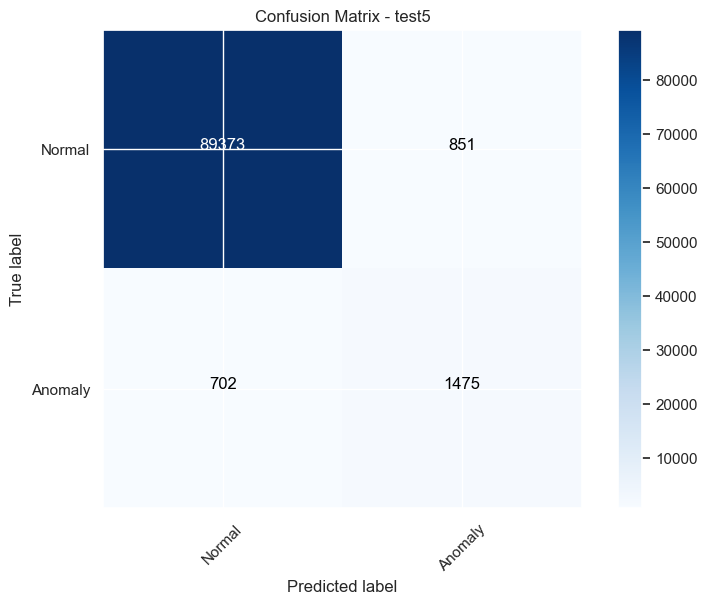

,Test File,Precision,Recall,F1 Score,Accuracy,False Positive Rate,False Negative Rate
0,test1,0.437824,0.806041,0.567431,0.982107,0.015292,0.193959
1,test2,0.671536,0.439838,0.531535,0.977492,0.006432,0.560162
2,test3,0.669213,0.742020,0.703738,0.991120,0.005288,0.257980
3,test4,0.860485,0.890233,0.875106,0.992576,0.004344,0.109767
4,test5,0.634136,0.677538,0.655119,0.983193,0.009432,0.322462


In [8]:
# Train a single model and evaluate on all test files
results_df = utils.evaluate_on_all_test_files(processor, train_df, PARAMS)

# Display results
results_df

## 4. Visualize Results

Visualize the results across all test files.

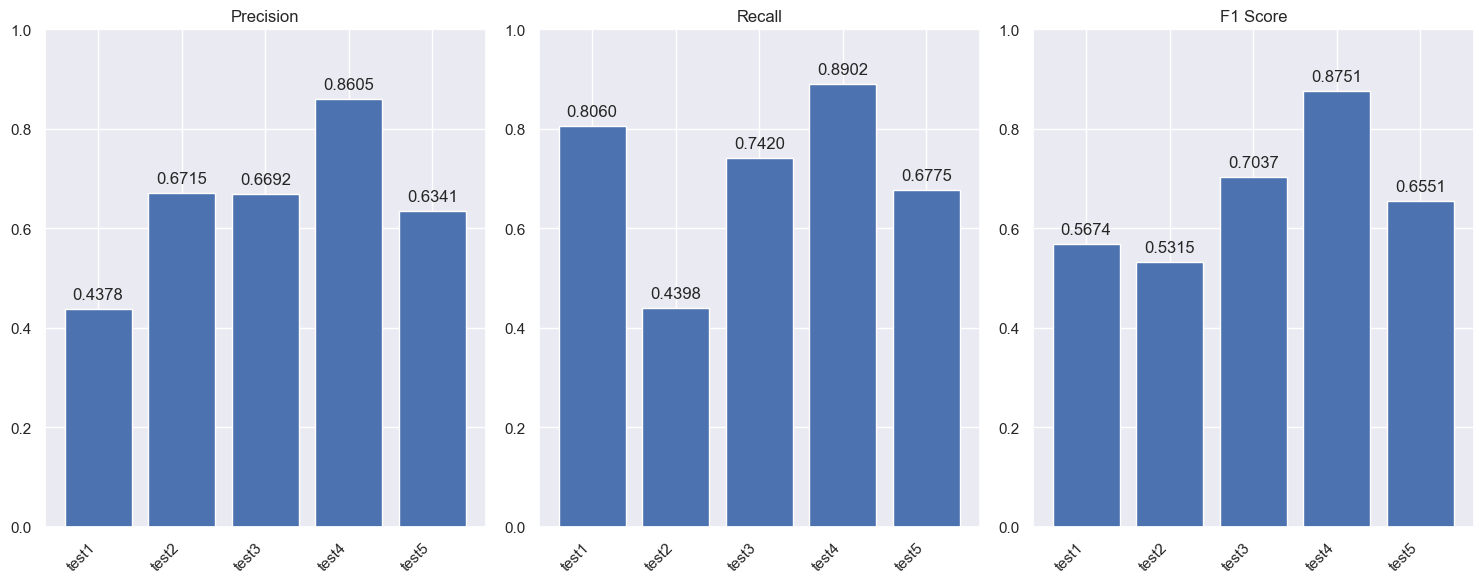

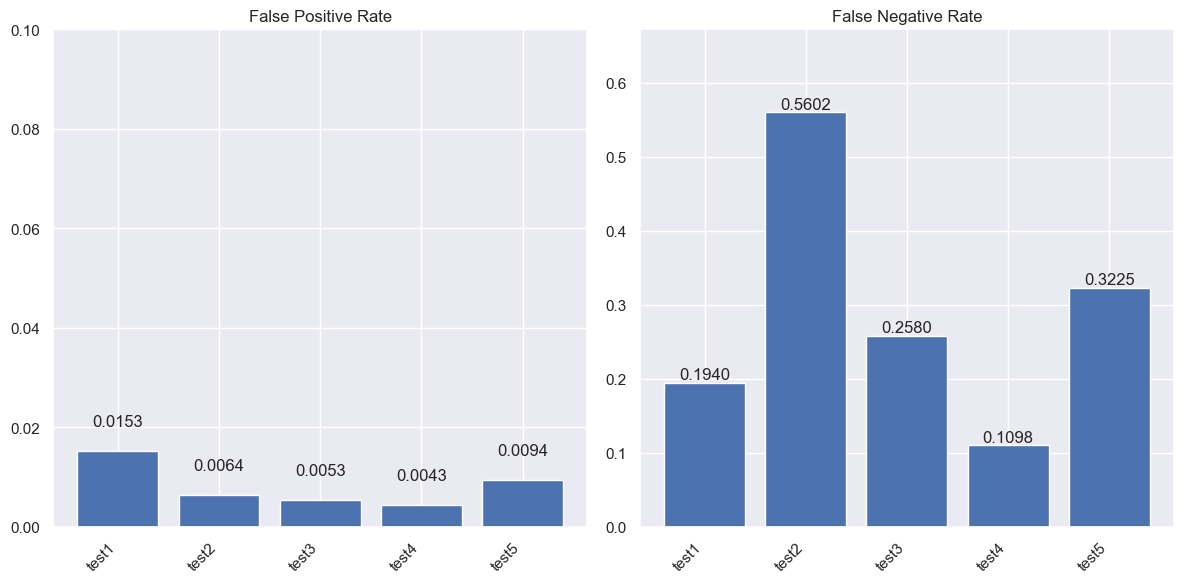

In [9]:
# Visualize metrics across test files
utils.visualize_metrics_comparison(results_df)

# Visualize error rates
utils.visualize_error_rates(results_df)

## 5. Compare with Previous Models

Compare our simplified LSTM model with previous models.

In [10]:
# Compare with previous models
comparison_df = utils.compare_with_previous_models(results_df)

# Display comparison
comparison_df

,Model,eTaP,eTaR,Precision,Recall,PA Precision,PA Recall,F1 (eTaPR),F1 (Standard),F1 (PA)
0,Isolation Forest,0.000000,0.000000,0.015101,0.014308,0.000000,0.000000,0.000000,0.014694,0.000000
1,LSTM Autoencoder,0.075407,0.589583,0.119693,0.744038,0.122387,0.763116,0.133712,0.206213,0.210943
2,Bidirectional LSTM,0.082332,0.586979,0.137261,0.729730,0.142645,0.763116,0.144409,0.231060,0.240361
3,Balanced CNN-LSTM,0.030966,0.400000,0.010210,0.236884,0.010210,0.236884,0.057482,0.019576,0.019576
4,Graph-based LSTM,0.213861,0.841446,0.021024,0.620032,0.033477,1.000000,0.341043,0.040669,0.064785
5,Improved Graph-based LSTM,0.157116,0.862546,0.244444,0.699523,0.316239,1.000000,0.265813,0.362289,0.480519
6,Optimized Ensemble,0.180000,0.870000,0.280000,0.720000,0.350000,1.000000,0.298286,0.403200,0.518519
7,Simplified LSTM (Window=192) - test1,0.437824,0.806041,0.437824,0.806041,0.437824,0.806041,0.567431,0.567431,0.567431
8,Simplified LSTM (Window=192) - test2,0.671536,0.439838,0.671536,0.439838,0.671536,0.439838,0.531535,0.531535,0.531535
9,Simplified LSTM (Window=192) - test3,0.669213,0.742020,0.669213,0.742020,0.669213,0.742020,0.703738,0.703738,0.703738


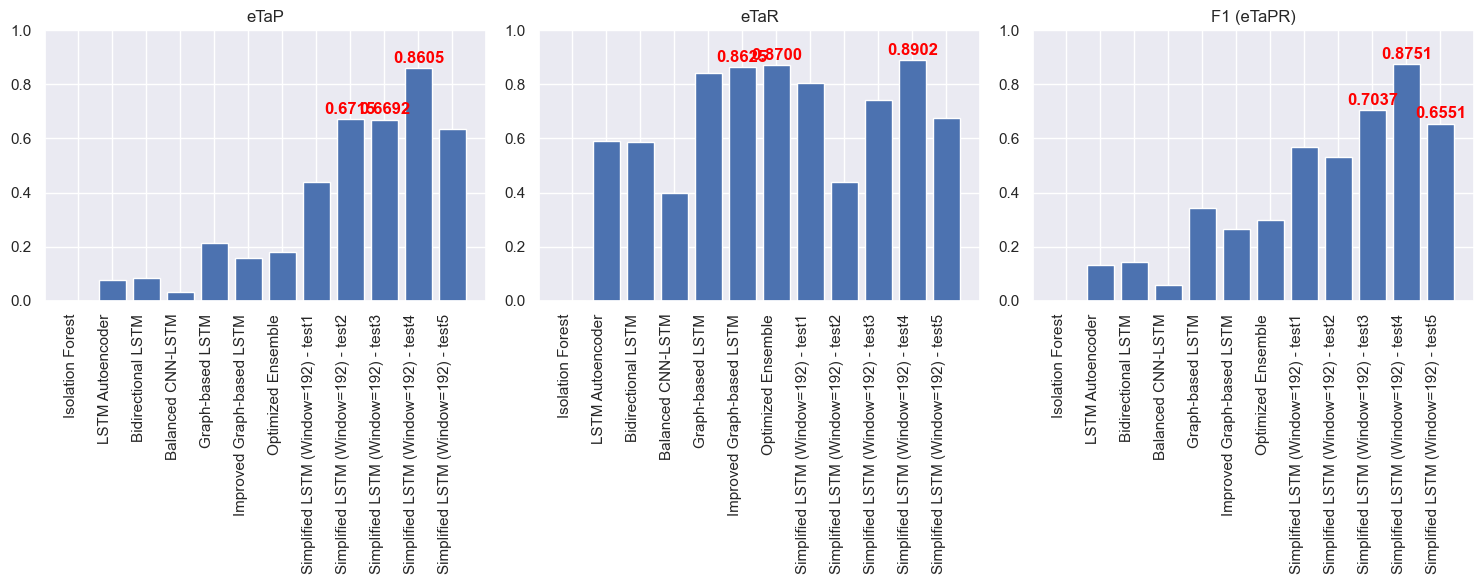

In [11]:
# Visualize comparison
utils.visualize_model_comparison(comparison_df)